In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import recall_score

In [2]:
new_column_names = ["transaction_time_step", "transaction_type", "transaction_amount", "origin_account_id", 
                    "origin_account_balance_before", "origin_account_balance_after", "destination_account_id", 
                    "destination_account_balance_before", "destination_account_balance_after", "is_fraudulent", 
                    "is_flagged_as_fraud"]

df = pd.read_csv('Fraud.csv', names=new_column_names, header = 0)
df.head(5)

,transaction_time_step,transaction_type,transaction_amount,origin_account_id,origin_account_balance_before,origin_account_balance_after,destination_account_id,destination_account_balance_before,destination_account_balance_after,is_fraudulent,is_flagged_as_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   transaction_time_step               int64  
 1   transaction_type                    object 
 2   transaction_amount                  float64
 3   origin_account_id                   object 
 4   origin_account_balance_before       float64
 5   origin_account_balance_after        float64
 6   destination_account_id              object 
 7   destination_account_balance_before  float64
 8   destination_account_balance_after   float64
 9   is_fraudulent                       int64  
 10  is_flagged_as_fraud                 int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.describe()

,transaction_time_step,transaction_amount,origin_account_balance_before,origin_account_balance_after,destination_account_balance_before,destination_account_balance_after,is_fraudulent,is_flagged_as_fraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(6362620, 11)

In [7]:
df.isnull().sum()

transaction_time_step                 0
transaction_type                      0
transaction_amount                    0
origin_account_id                     0
origin_account_balance_before         0
origin_account_balance_after          0
destination_account_id                0
destination_account_balance_before    0
destination_account_balance_after     0
is_fraudulent                         0
is_flagged_as_fraud                   0
dtype: int64

<h2>Explorartory Data Analysis<h2>

<h4>1. Univariate Analysis on Categorical Column<h4>

**1.1 transaction_time_step Column**

In [8]:
df['transaction_type'].value_counts()

transaction_type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

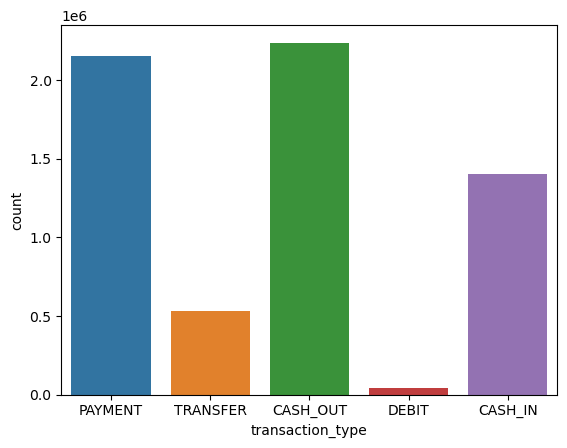

In [9]:
sns.countplot(df, x = 'transaction_type', hue='transaction_type');

- **Observations**
    - The most commonly used transaction types are 'CASH_OUT' and 'PAYMENT'. 
    - The least commonly used transaction type is 'DEBIT'.

**1.2 is_fraudulent Column**

In [10]:
df['is_fraudulent'].value_counts()

is_fraudulent
0    6354407
1       8213
Name: count, dtype: int64

<Axes: xlabel='is_fraudulent', ylabel='count'>

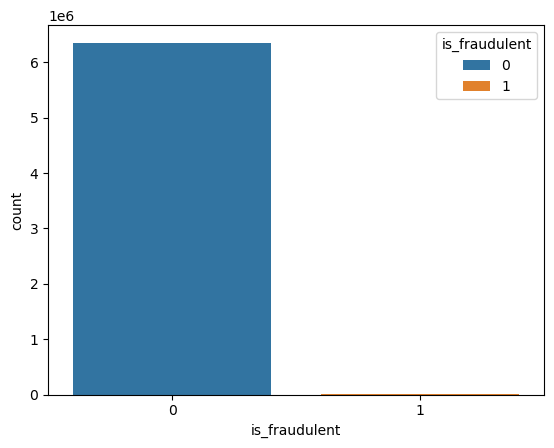

In [11]:
sns.countplot(df, x = 'is_fraudulent', hue='is_fraudulent')

- **Observations**
    - The 'isFraud' column is highly imbalanced, indicating a significant disparity between the classes.
    - In this case, 'accuracy' may not be the best metric to use. Instead, 'recall' is more appropriate because the focus should be on minimizing false negatives. 

**1.3 is_flagged_as_fraud Column**

In [12]:
df['is_flagged_as_fraud'].value_counts()

is_flagged_as_fraud
0    6362604
1         16
Name: count, dtype: int64

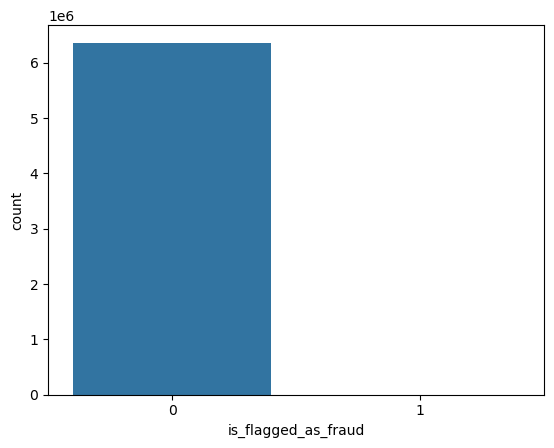

In [13]:
sns.countplot(df, x = 'is_flagged_as_fraud');

- **Observations**
    - The 'isFlaggedFraud' column is highly imbalanced, indicating a significant disparity between the classes.

<h4>2. Univariate Analysis on Numerical Column<h4>

**2.1 transaction_amount Column**

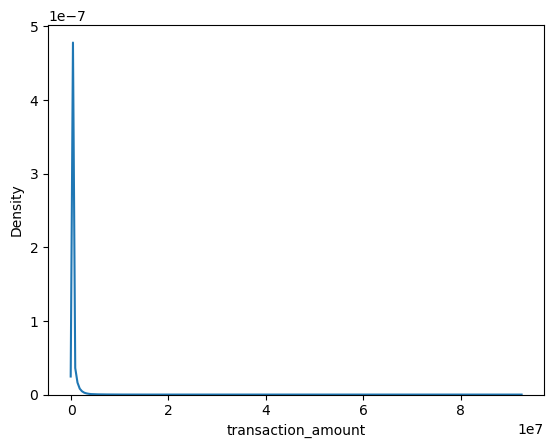

In [14]:
sns.kdeplot(df, x = 'transaction_amount');

In [15]:
df['transaction_amount'].skew()

30.99394948249038

<Axes: xlabel='transaction_amount'>

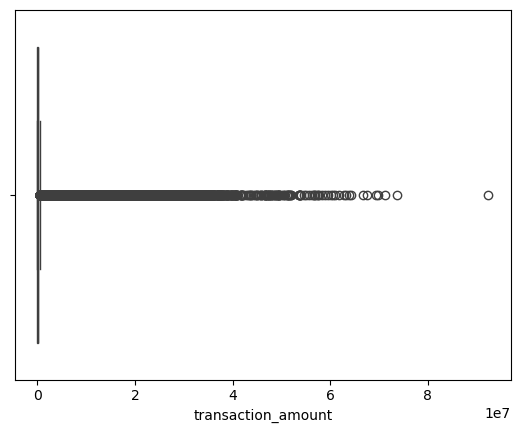

In [16]:
sns.boxplot(df, x = 'transaction_amount')

- **Observations**
    - The 'amount' column is highly right-skewed, so transformations need to be applied.
    - Additionally, there are many outliers present that need to be addressed.

**2.2 transaction_time_step Column**

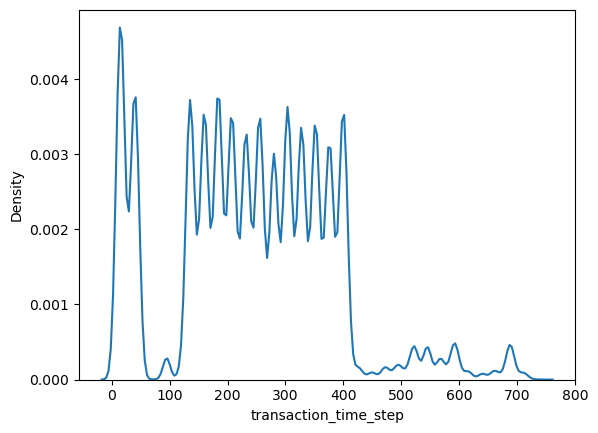

In [17]:
sns.kdeplot(df, x = 'transaction_time_step');

In [18]:
df['transaction_time_step'].skew()

0.37517688846984765

<Axes: xlabel='transaction_time_step'>

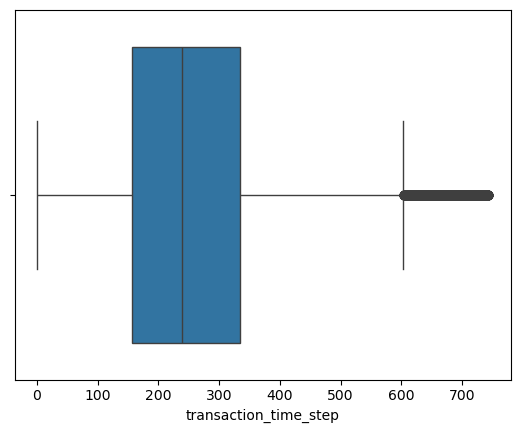

In [19]:
sns.boxplot(df, x = 'transaction_time_step')

- **Observations**
    - The plot is multi-modal and is slightly right-skewed.
    - There are some outliers that need to be handled.

**2.3 origin_account_balance_before Column**

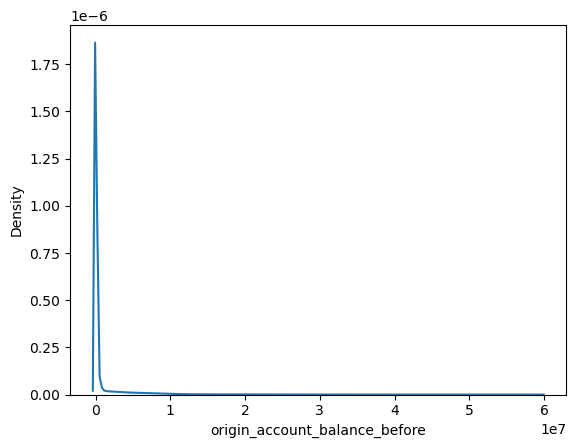

In [20]:
sns.kdeplot(df, x = 'origin_account_balance_before');

In [21]:
df['origin_account_balance_before'].skew()

5.249136420603121

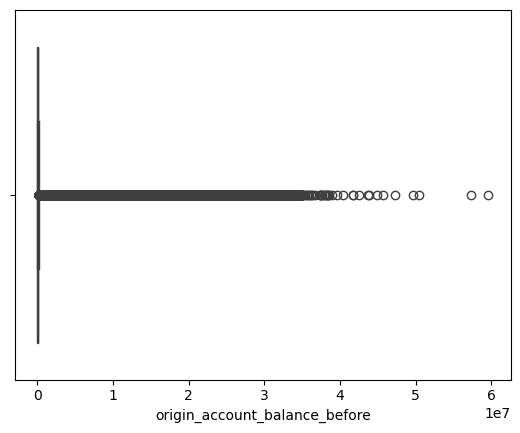

In [22]:
sns.boxplot(df, x = 'origin_account_balance_before');

- **Observations**
    - The column is right-skewed, so transformations need to be applied for better results.
    - There are a lot of outliers present that need to be handled.

**2.4 origin_account_balance_after Column**

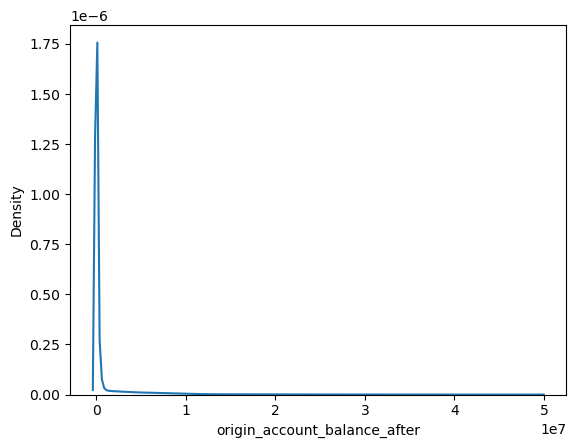

In [23]:
sns.kdeplot(df, x = 'origin_account_balance_after');

In [24]:
df['origin_account_balance_after'].skew()

5.176884001159233

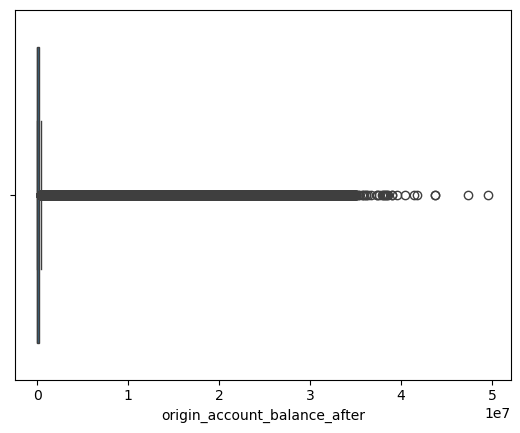

In [25]:
sns.boxplot(df, x = 'origin_account_balance_after');

- **Observations**
    - The column is highly skewed.
    - There are a lot of outliers that need to be handled.

<h4>3. Bivariate and Mutlivariate Analysis<h4>

In [26]:
corr = df.corr(numeric_only=True)
corr

,transaction_time_step,transaction_amount,origin_account_balance_before,origin_account_balance_after,destination_account_balance_before,destination_account_balance_after,is_fraudulent,is_flagged_as_fraud
transaction_time_step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
transaction_amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
origin_account_balance_before,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
origin_account_balance_after,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
destination_account_balance_before,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
destination_account_balance_after,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
is_fraudulent,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
is_flagged_as_fraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<Axes: >

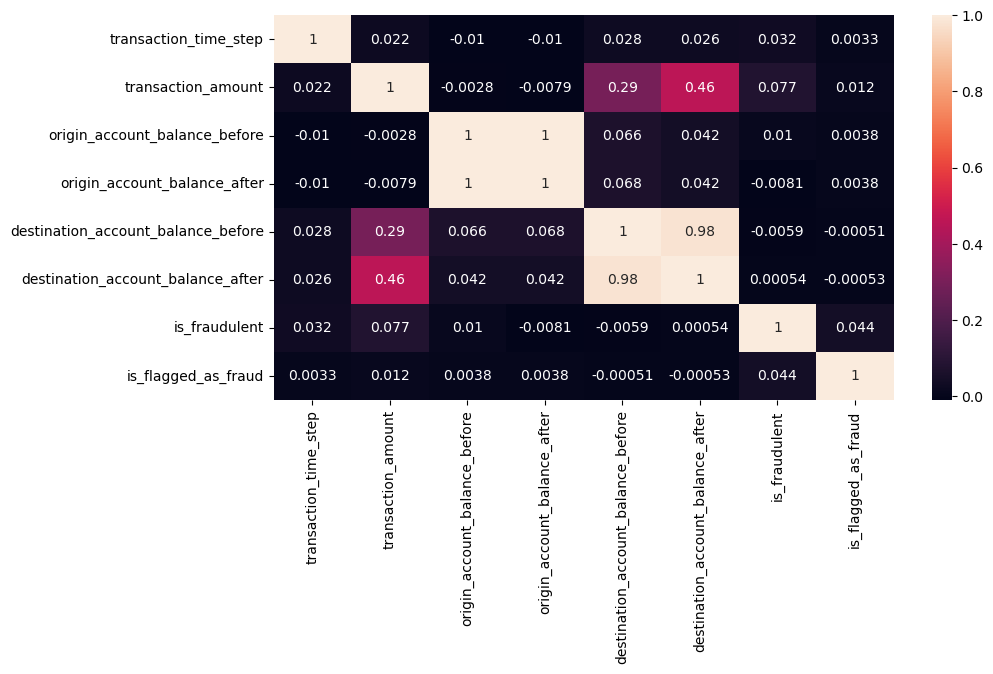

In [27]:
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True)

- **Observations**
    - Some columns have a very high correlation with each other.
    - Some columns exhibit a weak to moderate correlation.
    - Most of the columns have very weak or no correlation.  

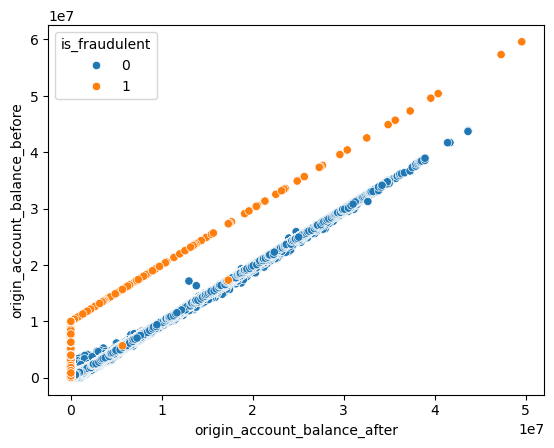

In [28]:
sns.scatterplot(df, x = 'origin_account_balance_after', y = 'origin_account_balance_before', hue='is_fraudulent');

- **Observation**
    - It is clear that a higher ratio of 'origin_account_balance_before' and 'origin_account_balance_after' value indicates that the person is likely fraudulent. 

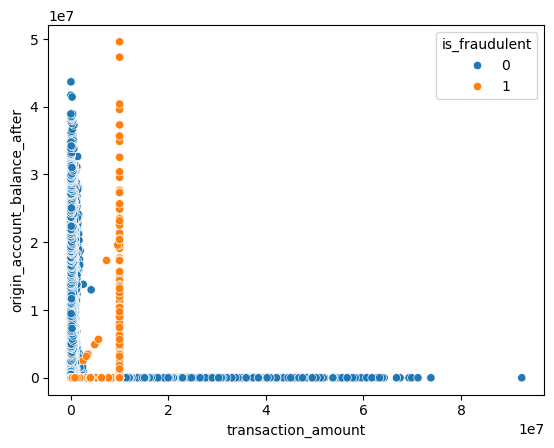

In [29]:
sns.scatterplot(df, x = 'transaction_amount', y = 'origin_account_balance_after', hue = 'is_fraudulent');

- **Observations**
    - It can be seen that most fraudulent transactions have the same transaction amount.
    - Some fraudulent transactions have nearly identical 'origin_account_balance_after' values

In [30]:
type_fraud = pd.crosstab(df['transaction_type'], df['is_fraudulent'])
type_fraud

is_fraudulent,0,1
transaction_type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


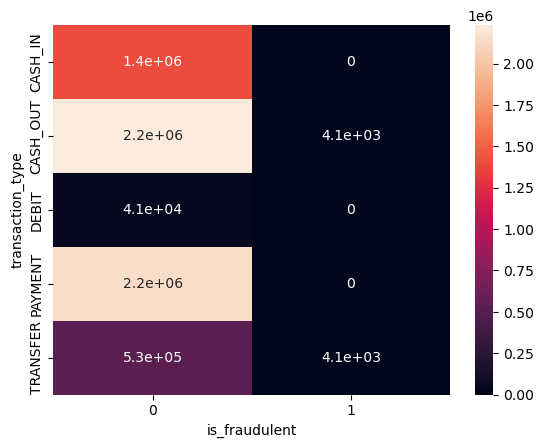

In [31]:
sns.heatmap(type_fraud, annot=True);

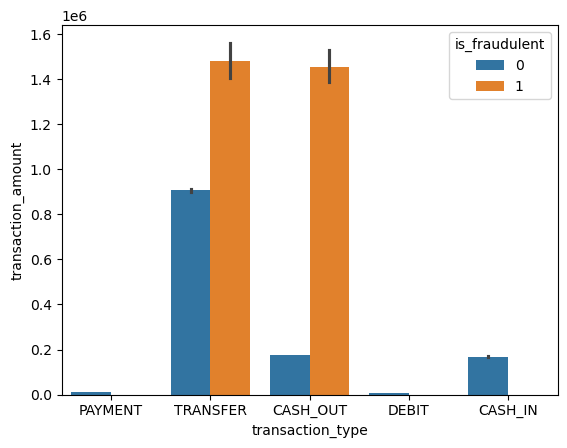

In [32]:
sns.barplot(df, x = 'transaction_type', y = 'transaction_amount', hue = 'is_fraudulent');

- **Observations**
    - Payment mode, debit mode, and cash-in mode are the top three in terms of transaction count.
    - Transfer mode and cash-out mode have higher averages compared to other modes. It can be inferred that most fraudulent transactions were conducted through these two modes, and the transaction amounts are also higher.

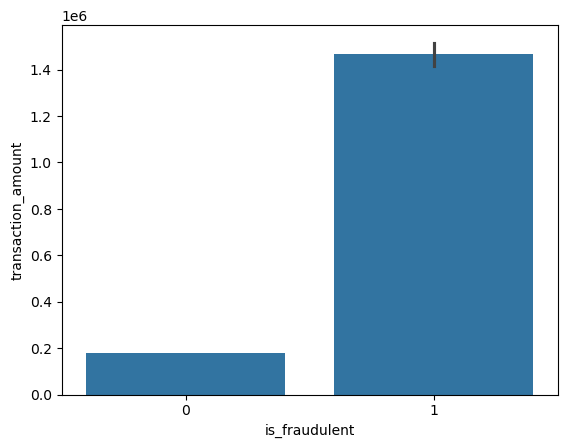

In [33]:
sns.barplot(df, x = 'is_fraudulent', y = 'transaction_amount');

- **Observations**
    - Overall, fraudulent transactions have a significantly higher average transaction amount compared to non-fraudulent ones. 

In [34]:
# HYPOTHESIS TESTING

# NULL HYPO : The average transaction amount is the same for both fraudulent and non-fraudulent transactions.
# ALTERNATE HYPO : The average transaction amount is different between fraudulent and non-fraudulent transactions.
# Significance Level = 0.05 (5%)

from scipy.stats import ttest_ind

# Split your data into two groups based on fraud status
fraudulent = df[df['is_fraudulent'] == 1]
non_fraudulent = df[df['is_fraudulent'] == 0]

# Perform the t-test on the 'amount' column
t_stat, p_value = ttest_ind(fraudulent['transaction_amount'], non_fraudulent['transaction_amount'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 194.01200466037974, P-value: 0.0


- P-value <= 0.05(Significance Level) -> This imply that we reject null hypothesis.
- Hence, there is a significant difference between transactions of fraudulent and non-fraudulent individuals.

In [35]:
type_flaggedFraud = pd.crosstab(df['transaction_type'], df['is_flagged_as_fraud'])
type_flaggedFraud

is_flagged_as_fraud,0,1
transaction_type,,
CASH_IN,1399284,0
CASH_OUT,2237500,0
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,532893,16


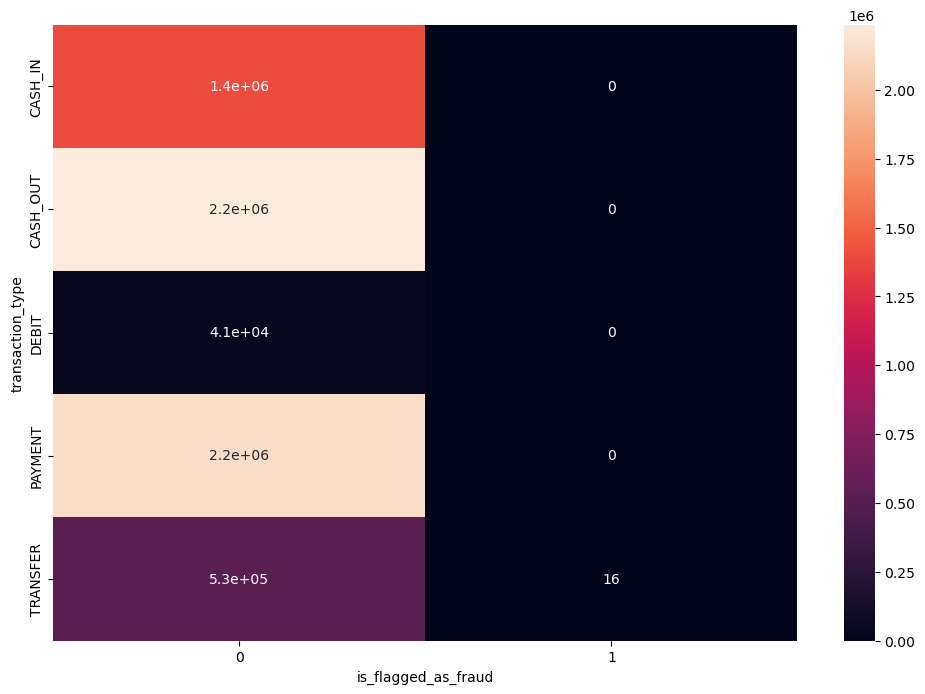

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(type_flaggedFraud, annot=True);

In [37]:
fraud_flaggedFraud = pd.crosstab(df['is_fraudulent'], df['is_flagged_as_fraud'])
fraud_flaggedFraud

is_flagged_as_fraud,0,1
is_fraudulent,,
0,6354407,0
1,8197,16


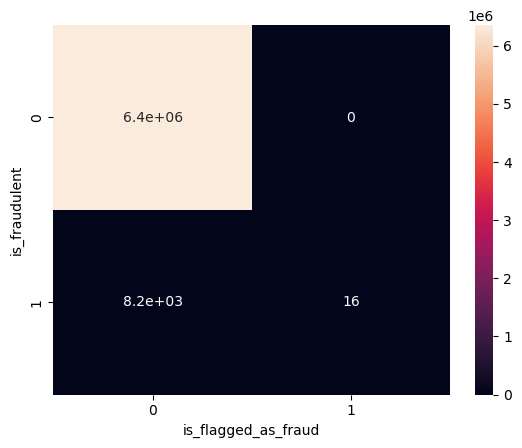

In [38]:
sns.heatmap(fraud_flaggedFraud, annot=True);

- **Observations**
    - All values flagged as fraudulent are from the 'Transfer' mode and are also marked as fraudulent transactions. This may be due to the fact that fraudulent transactions often involve transferring amounts greater than 200,000. 

In [39]:
transfers = df[df['transaction_type'] == 'TRANSFER']
transfers_and_more_amount = transfers[transfers['transaction_amount'] > 200000]
fraudulent_and_not_marked_fraudulent = transfers_and_more_amount[transfers_and_more_amount['is_fraudulent'] == 1]
len(fraudulent_and_not_marked_fraudulent)

2740

- **Observation**
    - The is_flagged_as_fraud parameter is not functioning effectively, as there are 2,740 instances where a transaction is fraudulent but not marked as such, despite the transaction amount exceeding 200,000.

<h2> Feature Engineering <h2>

<h4>-> Feature Construction <h4>

In [40]:
X = df.drop(['is_fraudulent'], axis=1)
y = df['is_fraudulent']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [42]:
X_train.shape, X_test.shape

((4453834, 10), (1908786, 10))

In [43]:
X_train['destination_account_balance_diff'] = (X_train['destination_account_balance_after'] - X_train['destination_account_balance_before'])/(X_train['destination_account_balance_before'] + 1)
X_train['origin_account_balance_diff'] = (X_train['origin_account_balance_after'] - X_train['origin_account_balance_before'])/(X_train['origin_account_balance_before'] +  1)

X_test['destination_account_balance_diff'] = (X_test['destination_account_balance_after'] - X_test['destination_account_balance_before'])/(X_test['destination_account_balance_before'] + 1)
X_test['origin_account_balance_diff'] = (X_test['origin_account_balance_after'] - X_test['origin_account_balance_before'])/(X_test['origin_account_balance_before'] + 1)

In [44]:
X_train['is_flagged_as_fraud_calc'] = np.where(X_train['transaction_amount'] > 200000, 1, 0)
X_test['is_flagged_as_fraud_calc'] = np.where(X_test['transaction_amount'] > 200000, 1, 0)

In [45]:
X_train['hour_of_day'] = X_train['transaction_time_step'] % 24
X_test['hour_of_day'] = X_test['transaction_time_step'] % 24

<h4>-> Feature Scaling <h4>

In [46]:
scaler = StandardScaler()
columns_to_scale = ['transaction_amount', 'origin_account_balance_before', 'origin_account_balance_after',
                    'destination_account_balance_before', 'destination_account_balance_after']

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale]= scaler.transform(X_test[columns_to_scale])

In [47]:
X_train['destination_account_balance_diff'].describe()

count    4.453834e+06
mean     1.968688e+04
std      2.719455e+05
min     -9.999999e-01
25%      0.000000e+00
50%      0.000000e+00
75%      2.400091e-01
max      6.096528e+07
Name: destination_account_balance_diff, dtype: float64

<Axes: xlabel='origin_account_balance_diff', ylabel='Density'>

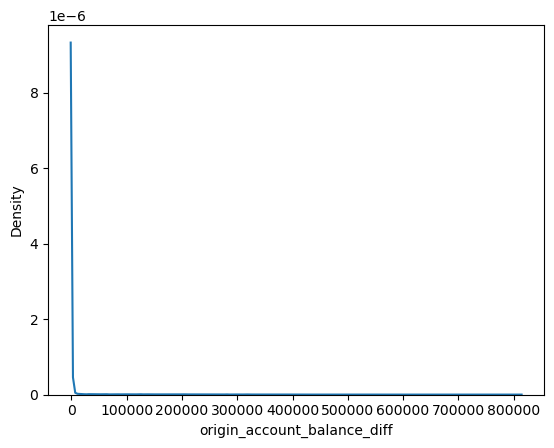

In [48]:
sns.kdeplot(X_train, x= 'origin_account_balance_diff')

In [49]:
X_train['origin_account_balance_diff'].skew()

33.82463445879599

<Axes: xlabel='destination_account_balance_diff', ylabel='Density'>

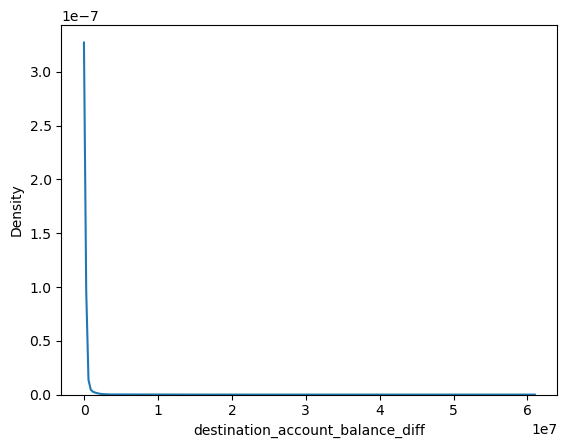

In [50]:
sns.kdeplot(X_train, x= 'destination_account_balance_diff')

In [51]:
X_train['destination_account_balance_diff'].skew()

93.06274806309047

In [52]:
X_train.sample()

,transaction_time_step,transaction_type,transaction_amount,origin_account_id,origin_account_balance_before,origin_account_balance_after,destination_account_id,destination_account_balance_before,destination_account_balance_after,is_flagged_as_fraud,destination_account_balance_diff,origin_account_balance_diff,is_flagged_as_fraud_calc,hour_of_day
2966332,231,TRANSFER,-0.270325,C915157598,-0.289019,-0.292758,C1400720500,-0.252097,-0.262745,0,0.067252,0.0,0,15


In [53]:
columns_to_transform = ['transaction_amount', 'destination_account_balance_diff', 'origin_account_balance_diff']
pt = PowerTransformer()
X_train[columns_to_transform] = pt.fit_transform(X_train[columns_to_transform])
X_test[columns_to_transform] = pt.transform(X_test[columns_to_transform])

In [54]:
X_train['destination_account_balance_diff'].skew()

0.3551397663329165

In [55]:
X_train['origin_account_balance_diff'].skew()

-0.0871950251830821

In [56]:
X_train['transaction_amount'].skew()

0.45419632581248415

- **Observation**
    - Able to reduce the skewness by a very high factor.

<h4>-> Feature Encoding <h4>

In [57]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

encoder.fit(X_train[['transaction_type']])

X_train_encoded = encoder.transform(X_train[['transaction_type']])
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['transaction_type']))
X_train_encoded_df.index = X_train.index

X_train = pd.concat([X_train.drop('transaction_type', axis=1), X_train_encoded_df], axis=1)

X_test_encoded = encoder.transform(X_test[['transaction_type']])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(['transaction_type']))
X_test_encoded_df.index = X_test.index

# Concatenate with the original X_test (dropping 'transaction_type')
X_test = pd.concat([X_test.drop('transaction_type', axis=1), X_test_encoded_df], axis=1)

In [58]:
X_train.head()

,transaction_time_step,transaction_amount,origin_account_id,origin_account_balance_before,origin_account_balance_after,destination_account_id,destination_account_balance_before,destination_account_balance_after,is_flagged_as_fraud,destination_account_balance_diff,origin_account_balance_diff,is_flagged_as_fraud_calc,hour_of_day,transaction_type_CASH_OUT,transaction_type_DEBIT,transaction_type_PAYMENT,transaction_type_TRANSFER
3386984,255,0.063707,C1272779650,-0.041919,-0.014491,C1524925444,-0.239654,-0.283004,0,-0.913598,0.546130,0,15,0.0,0.0,0.0,0.0
3418669,256,0.017108,C448207068,-0.289019,-0.292758,C1439867339,-0.284583,-0.271337,0,0.534493,0.409792,0,16,1.0,0.0,0.0,0.0
6111382,526,-1.114599,C1725622181,-0.278177,-0.283301,M1508522932,-0.324372,-0.334135,0,-0.201573,0.274398,0,22,0.0,0.0,1.0,0.0
5724103,398,1.638938,C189623261,-0.289019,-0.292758,C1859283825,0.093461,0.178466,0,0.213882,0.409792,1,14,0.0,0.0,0.0,1.0
2863697,227,1.227513,C666871844,0.878947,0.961270,C1454704107,0.781378,0.609192,0,-0.333723,0.497393,1,11,0.0,0.0,0.0,0.0


In [59]:
X_test.head()

,transaction_time_step,transaction_amount,origin_account_id,origin_account_balance_before,origin_account_balance_after,destination_account_id,destination_account_balance_before,destination_account_balance_after,is_flagged_as_fraud,destination_account_balance_diff,origin_account_balance_diff,is_flagged_as_fraud_calc,hour_of_day,transaction_type_CASH_OUT,transaction_type_DEBIT,transaction_type_PAYMENT,transaction_type_TRANSFER
1357114,138,0.542948,C1622644134,-0.289005,-0.292758,C1410204448,-0.324372,-0.291165,0,2.688633,-1.441426,0,18,1.0,0.0,0.0,0.0
1741821,161,-1.161027,C713507882,-0.289019,-0.292758,M750820911,-0.324372,-0.334135,0,-0.201573,0.409792,0,17,0.0,0.0,1.0,0.0
5332908,374,-0.711724,C1162363812,1.078346,1.068816,C922502124,1.903546,1.719108,0,-0.208333,0.418401,0,14,0.0,0.0,0.0,0.0
5398911,377,-0.944603,C742469163,-0.288700,-0.292758,M1218715527,-0.324372,-0.334135,0,-0.201573,-1.505678,0,17,0.0,0.0,1.0,0.0
5223348,370,-1.023410,C11682420,-0.285480,-0.292604,M2028882426,-0.324372,-0.334135,0,-0.201573,-1.384373,0,10,0.0,0.0,1.0,0.0


In [60]:
X_train = X_train.drop(['transaction_time_step', 'origin_account_id', 'origin_account_balance_before',
                        'origin_account_balance_after', 'destination_account_id', 'destination_account_balance_before', 
                        'destination_account_balance_after', 'is_flagged_as_fraud'], axis=1)

X_test = X_test.drop(['transaction_time_step', 'origin_account_id', 'origin_account_balance_before',
                        'origin_account_balance_after', 'destination_account_id', 'destination_account_balance_before', 
                        'destination_account_balance_after', 'is_flagged_as_fraud'], axis=1)

In [61]:
X_train.sample()

,transaction_amount,destination_account_balance_diff,origin_account_balance_diff,is_flagged_as_fraud_calc,hour_of_day,transaction_type_CASH_OUT,transaction_type_DEBIT,transaction_type_PAYMENT,transaction_type_TRANSFER
6248750,-0.934611,-0.201573,-1.50849,0,20,0.0,0.0,1.0,0.0


<Axes: xlabel='transaction_amount'>

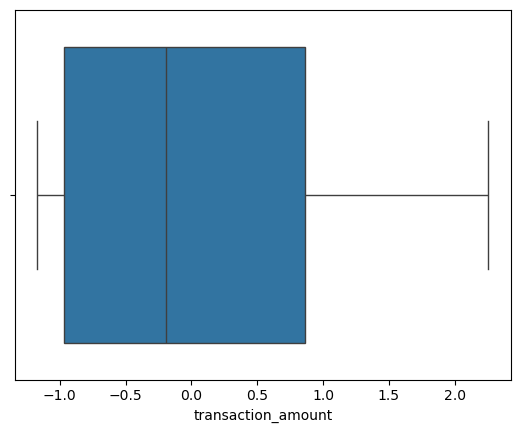

In [62]:
sns.boxplot(X_train, x= 'transaction_amount')

<Axes: xlabel='destination_account_balance_diff'>

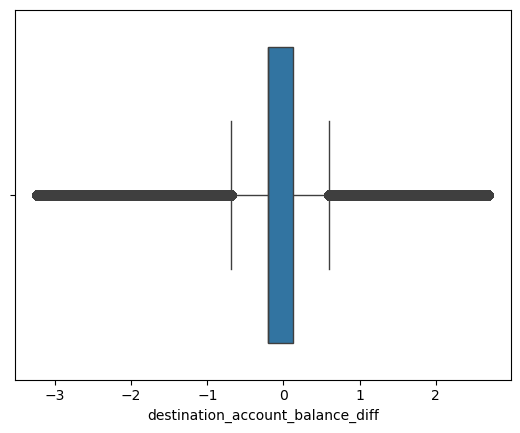

In [63]:
sns.boxplot(X_train, x = 'destination_account_balance_diff')

<Axes: xlabel='origin_account_balance_diff'>

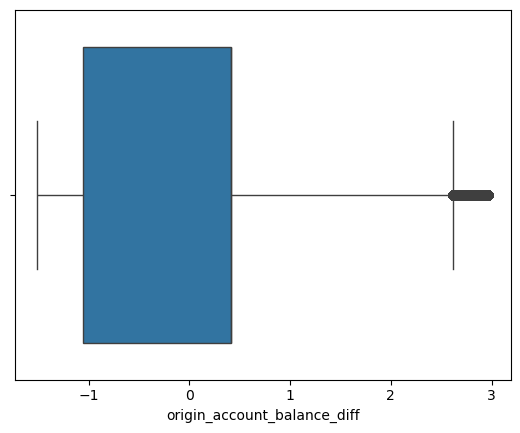

In [64]:
sns.boxplot(X_train, x = 'origin_account_balance_diff')

<Axes: xlabel='hour_of_day'>

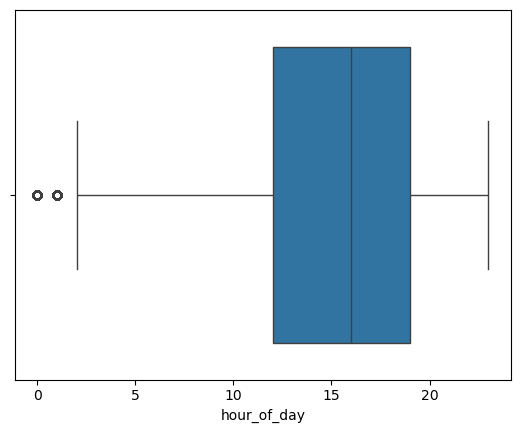

In [65]:
sns.boxplot(X_train, x = 'hour_of_day')

- **Obserations**
    - The outliers shown above are so clustered that they do not behave like typical outliers.

<h4>-> Model Training <h4>

In [72]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Recall on test data: ", recall_score(y_test, y_pred_rf))

Recall on test data:  0.8046623794212219


In [73]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("Recall on test data: ", recall_score(y_test, y_pred_xgb))

Recall on test data:  0.807475884244373


**-> Hyperparameter Tuning**

In [75]:
xgb = XGBClassifier()
param_grid_xgb = {
    'n_estimators': [50, 100, 200, 300],  
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  
    'max_depth': [3, 5, 7, 9],            
    'min_child_weight': [1, 3, 5, 7],   
    'subsample': [0.6, 0.8, 1.0]        
}

In [76]:
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb)
random_search_xgb.fit(X_train, y_train)
print("Best parameters found: ", random_search_xgb.best_params_)

Best parameters found:  {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 7, 'max_depth': 7, 'learning_rate': 0.1}


In [78]:
best_model_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)
print("Recall on test data: ", recall_score(y_test, y_pred_xgb))

Recall on test data:  0.8062700964630225


In [81]:
rf = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],  
    'max_depth': [None, 10, 20, 30, 40],  
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4],        
    'bootstrap': [True, False]
}   

In [83]:
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf)
random_search_rf.fit(X_train, y_train)
print("Best parameters found: ", random_search_rf.best_params_)

In [ ]:
best_model_rf = random_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)
print("Recall on test data: ", recall_score(y_test, y_pred_rf))